In [1]:
import numpy as np
import math
import random as rnd
import matplotlib.pyplot as plt
from scipy.sparse import lil_matrix 

In [2]:
N = 1000
y = np.array([None]*N)

def llenarY(N=100):
    for n in range(N):
      y[n] = math.cos(((2*math.pi*n)/N))+0.1*rnd.random()


def f(x):
    f = 0
    for i in range(N):
        aux = x[i] - y[i]
        f += aux**2
        if i > 0:
            aux = x[i]-x[i-1]
            f += 2.5*aux**2
    return f


# gradiente  ∇f
def grad(x):
    g = np.array([None]*N)
    for i in range(N):
        g[i] = 2.0*(x[i]-y[i])
        if i > 0:
            g[i] += 5*(x[i]-x[i-1])
        if i < N-1:
            g[i] += 5*(x[i]-x[i+1])
    return g


def hessiano(x):
    a = lil_matrix((N, N))
    for c in range(N):
        if (c-1 >= 0):
            a[c, c-1] = -5
        if (1 <= c < N-1):
            a[c, c] = 12
        else:
            a[c, c] = 7
        if (c+1 < N):
            a[c, c+1] = -5
    return a 

    # return np.array([
    #     [7, -5, 0, 0, 0, 0, 0, 0, 0, 0],
    #     [-5, 12, -5, 0, 0, 0, 0, 0, 0, 0],
    #     [0, -5, 12, -5, 0, 0, 0, 0, 0, 0],
    #     [0, 0, -5, 12, -5, 0, 0, 0, 0, 0],
    #     [0, 0, 0, -5, 12, -5, 0, 0, 0, 0],
    #     [0, 0, 0, 0, -5, 12, -5, 0, 0, 0],
    #     [0, 0, 0, 0, 0, -5, 12, -5, 0, 0],
    #     [0, 0, 0, 0, 0, 0, -5, 12, -5, 0],
    #     [0, 0, 0, 0, 0, 0, 0, -5, 12, -5],
    #     [0, 0, 0, 0, 0, 0, 0, 0, -5, 7]
    # ])


# dirección del gradiente p
def dirgrad(x):
    vgrad = grad(x)
    magGrad = np.sqrt(vgrad.dot(vgrad))
    p = -vgrad/magGrad
    return p


In [3]:
# Buggfix y forma de comparar una matriz con otra.
# N = 10
# a = a = lil_matrix((N, N))
# for c in range(N):
#     if (c-1 >= 0):
#         a[c, c-1] = -5
#     if (1 <= c < N-1):
#         a[c, c] = 12
#     else:
#         a[c, c] = 7
#     if (c+1 < N):
#         a[c, c+1] = -5

# b = np.array([
#         [7, -5, 0, 0, 0, 0, 0, 0, 0, 0],
#         [-5, 12, -5, 0, 0, 0, 0, 0, 0, 0],
#         [0, -5, 12, -5, 0, 0, 0, 0, 0, 0],
#         [0, 0, -5, 12, -5, 0, 0, 0, 0, 0],
#         [0, 0, 0, -5, 12, -5, 0, 0, 0, 0],
#         [0, 0, 0, 0, -5, 12, -5, 0, 0, 0],
#         [0, 0, 0, 0, 0, -5, 12, -5, 0, 0],
#         [0, 0, 0, 0, 0, 0, -5, 12, -5, 0],
#         [0, 0, 0, 0, 0, 0, 0, -5, 12, -5],
#         [0, 0, 0, 0, 0, 0, 0, 0, -5, 7]
#     ])
# aAsArray=a.toarray()
# aAsArray==b

In [4]:
#Calculos de phi
def phiAlpha(x0, alpha, p):
    paX = x0 + p * alpha
    return f(paX)


def phipAlpha(x0, alpha, p):
    x = x0 + alpha * p
    vgrad = grad(x)
    return (np.dot(vgrad, p))


def phipp(x0, alpha, p):
    x = x0 + alpha * p
    ahess = hessiano(x)
    return np.dot(np.dot(ahess, p), p)


In [5]:
# Gradiente Conjugado

def gradienteConjugado(x0, b, k=0, tol=1e-6):
    A = hessiano(x0)
    r = A.dot(x0)-b
    p = r*-1
    print(x0)
    print("k, x0, alpha, beta, Ap")
    rDotr = np.dot(r, r)
    AdotP = A.dot(p)
    while np.linalg.norm(r) >= tol:
        alpha = rDotr / np.dot(AdotP, p)
        x0 = x0 + alpha*p
        r1 = r + alpha * AdotP
        b = (np.dot(r1, r1))/rDotr
        p = -r1 + b*p
        # print(x0, f(x0), alpha, b)
        print(k, x0, alpha, b, AdotP)
        r = r1
        rDotr = np.dot(r, r)
        AdotP = A.dot(p)
        k += 1
    return x0


In [6]:
# Descenso de Gradiente
from timeit import default_timer as timer

def exhaustivoRefinado(p, xini, alpha=0, h=0.1, tol=1e-6):
    """Busqueda de minimo con metodo exhaustivo refinado. puedes cambiar el paso
    Retorna f(a) y alpha
    """
    k = 0
    while h > tol:
        while phiAlpha(xini, alpha+h, p) < phiAlpha(xini, alpha, p):
            alpha = alpha + h
            fnow = phiAlpha(xini, alpha, p)
            # print(k, h, fnow)
            k += 1
        alpha = alpha-h
        h = h / 10
    return alpha

def gradDescent(x0, k=0, tol=1e-4):
    print("k, x^(k), p^(k), f(x^(k), θ, t")
    op = dirgrad(x0)
    while np.linalg.norm(grad(x0)) >= tol:
        p = dirgrad(x0)
        alpha = exhaustivoRefinado(p, x0)
        # print(f"a: {alpha}")
        x0 = x0 + alpha*p
        if k >= 1:
            angulo = np.arccos(np.dot(op, p))
            op = p
            print(
                f"{k}, {x0}, {p} , {f(x0)}, {round(np.degrees(angulo),6)}, {timer()} ")
        else:
            print(f"{k}, {x0}, {p} , {f(x0)}, - , {timer()}")

        k = k+1
    return x0

In [7]:
# llenar Y 
llenarY(N=1000)
b = [2*i for i in y]
x0 = np.array([2*i for i in y])

In [8]:
print("<==Grad Conjugado==>")
limpio = gradienteConjugado(x0, b)


<==Grad Conjugado==>
[ 2.06373454e+00  2.05444915e+00  2.17126451e+00  2.14857646e+00
  2.14944372e+00  2.10745393e+00  2.03936242e+00  2.09544301e+00
  2.17486369e+00  2.08134033e+00  2.00852306e+00  2.18471483e+00
  2.15795377e+00  2.13678126e+00  2.07369941e+00  2.01848066e+00
  2.11719808e+00  2.01122014e+00  2.06768345e+00  2.00071463e+00
  2.13085288e+00  2.06841707e+00  2.05383525e+00  2.08956459e+00
  2.12866880e+00  2.06545927e+00  2.07686564e+00  2.12204039e+00
  1.99356927e+00  2.14313679e+00  2.12463010e+00  2.00716382e+00
  2.12671878e+00  2.11678994e+00  1.99754905e+00  2.14031857e+00
  2.13513566e+00  2.07603696e+00  2.08744552e+00  2.11712497e+00
  1.94899783e+00  2.07935124e+00  1.98610860e+00  2.05504365e+00
  1.93781279e+00  2.06824098e+00  1.97526301e+00  2.06239815e+00
  1.96376216e+00  1.95038815e+00  1.98793219e+00  2.01541714e+00
  2.05257712e+00  2.05898137e+00  1.97888864e+00  1.93026518e+00
  2.05578559e+00  2.00794898e+00  1.88069315e+00  1.94528308e+00
  1.

In [9]:
print("<==Descenso de Gradiente==>")
limpioDG = gradDescent(x0)


<==Descenso de Gradiente==>
k, x^(k), p^(k), f(x^(k), θ, t
0, [1.6899484348452147 1.8022167942822678 1.6630992854273887
 1.788848167847242 1.7307416141305003 1.7110296329979695
 1.7880942972296199 1.7449359589524784 1.6364431795502818
 1.7309984922874853 1.8732834521747495 1.6179710954703372
 1.780651595554326 1.72116150825181 1.7133362588639536 1.7972729393598068
 1.5608706878305005 1.7988313053689642 1.5921002248554141
 1.8208895629279112 1.5828423428533256 1.7444087921522726
 1.734586217357994 1.7224159967369852 1.660987009878637 1.76567745472983
 1.7388854592161087 1.592355195416511 1.8866894993342507 1.614649378775395
 1.660634416799576 1.8615476190790141 1.635318396895494 1.6450140539367912
 1.87576841321352 1.6301518452604957 1.7091735255568843 1.7707424947592436
 1.7338654284440658 1.5669117836519577 1.8681182845254873
 1.5129879087853602 1.777934506922465 1.5261372447703667
 1.8139028703015172 1.5040138667619258 1.7848951164168174
 1.5325386588444507 1.691423619206202 1.650000

In [10]:
# Evaluamos el gradiente condición de primer orden 

# gc = grad(limpio)
# dg = grad(limpioDG)
# print(gc)
# print(dg)
from scipy.sparse.linalg import splu
A = hessiano(x0)

aAsArray = A.toarray()
limpioInv = np.dot(np.linalg.inv(aAsArray), b)
limpioInv
# np.linalg.det(aAsArray)


array([ 1.04319707e+00,  1.04772899e+00,  1.06046268e+00,  1.06312853e+00,
        1.06133050e+00,  1.05417593e+00,  1.04720095e+00,  1.05123386e+00,
        1.05667171e+00,  1.04980552e+00,  1.04659346e+00,  1.06031418e+00,
        1.06121760e+00,  1.05501730e+00,  1.04346767e+00,  1.03456523e+00,
        1.03579275e+00,  1.02789775e+00,  1.02891783e+00,  1.02796834e+00,
        1.03806327e+00,  1.03721293e+00,  1.03756435e+00,  1.04217446e+00,
        1.04574143e+00,  1.04187121e+00,  1.04165762e+00,  1.04273396e+00,
        1.03649580e+00,  1.04614211e+00,  1.04561791e+00,  1.03841484e+00,
        1.04514496e+00,  1.04458929e+00,  1.03851136e+00,  1.04832817e+00,
        1.04941252e+00,  1.04323475e+00,  1.03914349e+00,  1.03322052e+00,
        1.01716077e+00,  1.01816575e+00,  1.01056679e+00,  1.00997282e+00,
        1.00235926e+00,  1.00812684e+00,  1.00349695e+00,  1.00521325e+00,
        9.96535214e-01,  9.93718833e-01,  9.98312355e-01,  1.00464438e+00,
        1.00975073e+00,  

In [11]:
for i in range (N):
    print(y[i], limpio[i], limpioDG[i], limpioInv[i])

1.0318672717862978 1.043197072189631 1.0431989117238238 1.0431970706473672
1.0272245758954355 1.047728992787289 1.047730830302571 1.0477289901917952
1.085632255079729 1.0604626720906163 1.0604645169442941 1.0604626754547668
1.0742882298075256 1.0631285252313165 1.0631303673884 1.063128528867755
1.0747218603853175 1.0613305010290337 1.06133234333444 1.061330501904834
1.0537269626539265 1.0541759276352871 1.054177767822877 1.054175931549719
1.0196812112180738 1.047200945517336 1.0472027897168188 1.0472009487529212
1.0477215068924055 1.0512338626387119 1.0512356943790315 1.051233860970063
1.0874318447937887 1.0566717142774085 1.0566735549579847 1.056671714818268
1.040670163180041 1.0498055200125225 1.049807346745224 1.0498055166762648
1.0042615283102212 1.0465934645613946 1.0465952989192135 1.0465934599327498
1.0923574161728697 1.0603141849030884 1.0603160023394282 1.0603141758382473
1.0789768846049723 1.0612176050128985 1.0612194331308753 1.0612175956098941
1.068390630382362 1.0550173093

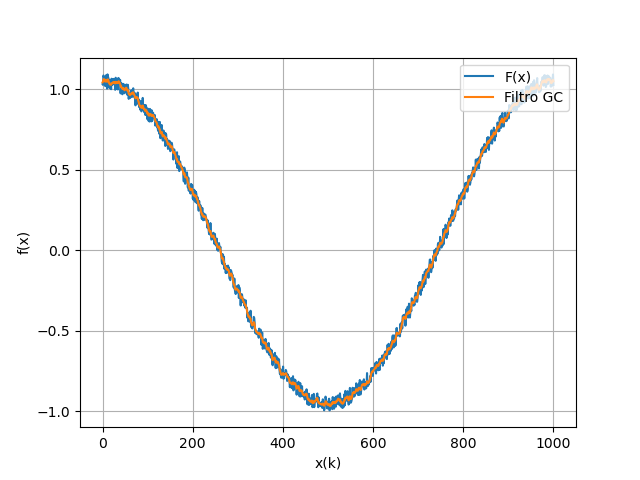

In [18]:
# Graficar
%matplotlib ipympl

x = np.linspace(0,1000, 1000)
plt.plot(x, y, label="F(x)")
plt.plot(x, limpio , label="Filtro GC")
# plt.plot(x, limpioDG , label="Filtro DG")
# plt.plot(x, limpioInv, label="Filtro  A^-1")
plt.xlabel('x(k)')
plt.ylabel('f(x)')
plt.title('')
plt.legend(loc=1)
plt.grid()
